In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
# Load data
data = load_diabetes()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Baseline ANN (no regularization)
baseline_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

baseline_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

history_base = baseline_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


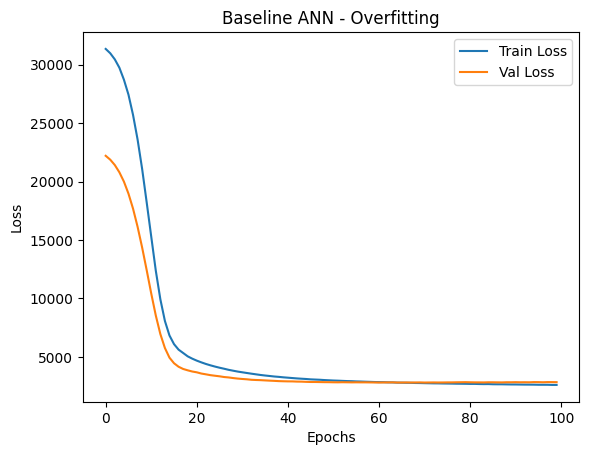

In [4]:
# Plot overfitting
plt.plot(history_base.history['loss'], label='Train Loss')
plt.plot(history_base.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Baseline ANN - Overfitting")
plt.legend()
plt.show()


In [5]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [6]:
l2_model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01),
          input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

l2_model.compile(optimizer='adam', loss='mse')

history_l2 = l2_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)


In [7]:
dropout_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

dropout_model.compile(optimizer='adam', loss='mse')

history_dropout = dropout_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)


In [8]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

early_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

early_model.compile(optimizer='adam', loss='mse')

history_early = early_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)


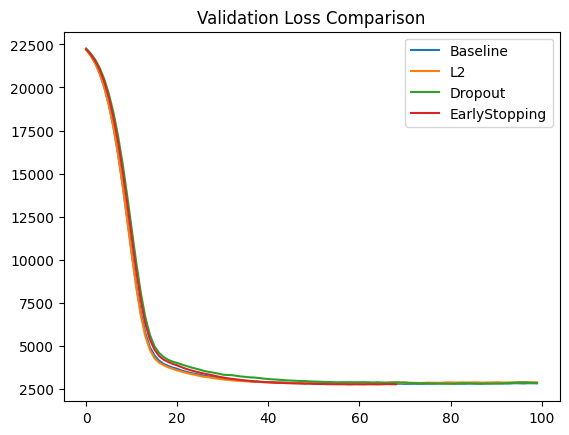

In [9]:
plt.plot(history_base.history['val_loss'], label='Baseline')
plt.plot(history_l2.history['val_loss'], label='L2')
plt.plot(history_dropout.history['val_loss'], label='Dropout')
plt.plot(history_early.history['val_loss'], label='EarlyStopping')
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()


In [10]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten


In [11]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

cnn_model.evaluate(X_test, y_test)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.7471 - loss: 0.7192 - val_accuracy: 0.8532 - val_loss: 0.4044
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 59ms/step - accuracy: 0.8750 - loss: 0.3475 - val_accuracy: 0.8860 - val_loss: 0.3214
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 58ms/step - accuracy: 0.8955 - loss: 0.2903 - val_accuracy: 0.8993 - val_loss: 0.2792
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9049 - loss: 0.2575 - val_accuracy: 0.8977 - val_loss: 0.2730
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.9163 - loss: 0.2281 - val_accuracy: 0.9033 - val_loss: 0.2674
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.9237 - loss: 0.2079 - val_accuracy: 0.9070 - val_loss: 0.2554
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9304 - loss: 0.1871 - val_accuracy: 0.9068 - val_loss: 0.2625
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9403 - loss: 0.1661 - 

[0.2774847447872162, 0.90420001745224]

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [14]:
# Use CIFAR-10 for simplicity
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = tf.image.resize(X_train, (96,96))
X_test = tf.image.resize(X_test, (96,96))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [15]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(96,96,3)
)
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 362s 570ms/step - accuracy: 0.6913 - loss: 0.8968 - val_accuracy: 0.7825 - val_loss: 0.6337
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 381s 569ms/step - accuracy: 0.8024 - loss: 0.5638 - val_accuracy: 0.8002 - val_loss: 0.5808
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 380s 567ms/step - accuracy: 0.8294 - loss: 0.4864 - val_accuracy: 0.8107 - val_loss: 0.5506
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 365s 540ms/step - accuracy: 0.8410 - loss: 0.4462 - val_accuracy: 0.8112 - val_loss: 0.5445
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 352s 564ms/step - accuracy: 0.8633 - loss: 0.3945 - val_accuracy: 0.7971 - val_loss: 0.6062


In [18]:
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2
)

model.evaluate(X_test, y_test)


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 520s 815ms/step - accuracy: 0.6811 - loss: 1.1071 - val_accuracy: 0.8059 - val_loss: 0.6121
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 512s 818ms/step - accuracy: 0.8019 - loss: 0.6030 - val_accuracy: 0.8060 - val_loss: 0.5958
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 537s 859ms/step - accuracy: 0.8342 - loss: 0.4743 - val_accuracy: 0.8116 - val_loss: 0.5771
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - accuracy: 0.8148 - loss: 0.5893


[0.5974607467651367, 0.8116999864578247]